<a href="https://colab.research.google.com/github/Timothy-M-C/cs4372/blob/main/cs4372_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###CS 4372 MACHINE LEARNING USING TREES
### Ryan Sharp (RXS180092), Timothy Cox(TMC190004)

### 2.1 Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data from uci
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##**Attributes**

**age:** 

**workclass:** 

**fnlwgt:** 

**education:**

**education-num:**

**marital-status:**

**occupation:** 

**relationship:**

**race:**

**sex:**

**capital-gain:**

**capital-loss:** 

**hours-per-week:** 

**native-country:**

In [3]:
# title data columns
data.columns = ["age", "work-class", "fnlwgt", "education", "education num", "marital status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

In [4]:
data.head()

,age,work-class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education num   32561 non-null  int64 
 5   marital status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#check for nulls
data.isna().sum()

age               0
work-class        0
fnlwgt            0
education         0
education num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [7]:
# attribute summary
data.describe()

,age,fnlwgt,education num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# one hot encode categorical variables
data_encoded= pd.get_dummies(data, columns=["work-class", "education", "marital status", "occupation", "relationship", "race", "sex", "native-country", "class"])

In [41]:
len(data_encoded.columns)

34

In [9]:
# plot correlation matrix
corr = data_encoded.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


In [10]:
# after looking at the correlation, sex, relationship, occupation, marital status, age, education number, cap gain and hours worked
# will be our reduced data set. All these attributes have correlations > |0.2|
data = data.drop(["native-country","work-class", "fnlwgt", "education", "race", "capital-loss"], axis = 1)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education num   32561 non-null  int64 
 2   marital status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   sex             32561 non-null  object
 6   capital-gain    32561 non-null  int64 
 7   hours-per-week  32561 non-null  int64 
 8   class           32561 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.2+ MB


In [11]:
data.head() #new subset of data, create response, convert to binary 0-1 output 1 >50k 0 <=50k
response= pd.DataFrame()
response['class'] = data['class']
response['class'] = response['class'].map({' >50K': 1, ' <=50K': 0})

In [12]:
data.drop(['class'],axis=1)

,age,education num,marital status,occupation,relationship,sex,capital-gain,hours-per-week
0,39,13,Never-married,Adm-clerical,Not-in-family,Male,2174,40
1,50,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,13
2,38,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,40
3,53,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,40
4,28,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,40
...,...,...,...,...,...,...,...,...
32556,27,12,Married-civ-spouse,Tech-support,Wife,Female,0,38
32557,40,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,40
32558,58,9,Widowed,Adm-clerical,Unmarried,Female,0,40
32559,22,9,Never-married,Adm-clerical,Own-child,Male,0,20


In [13]:
#re encode new reduced data
data_encoded = pd.get_dummies(data, columns=["marital status", "occupation", "relationship","sex"])
data_encoded = data_encoded.drop(['class'], axis = 1)


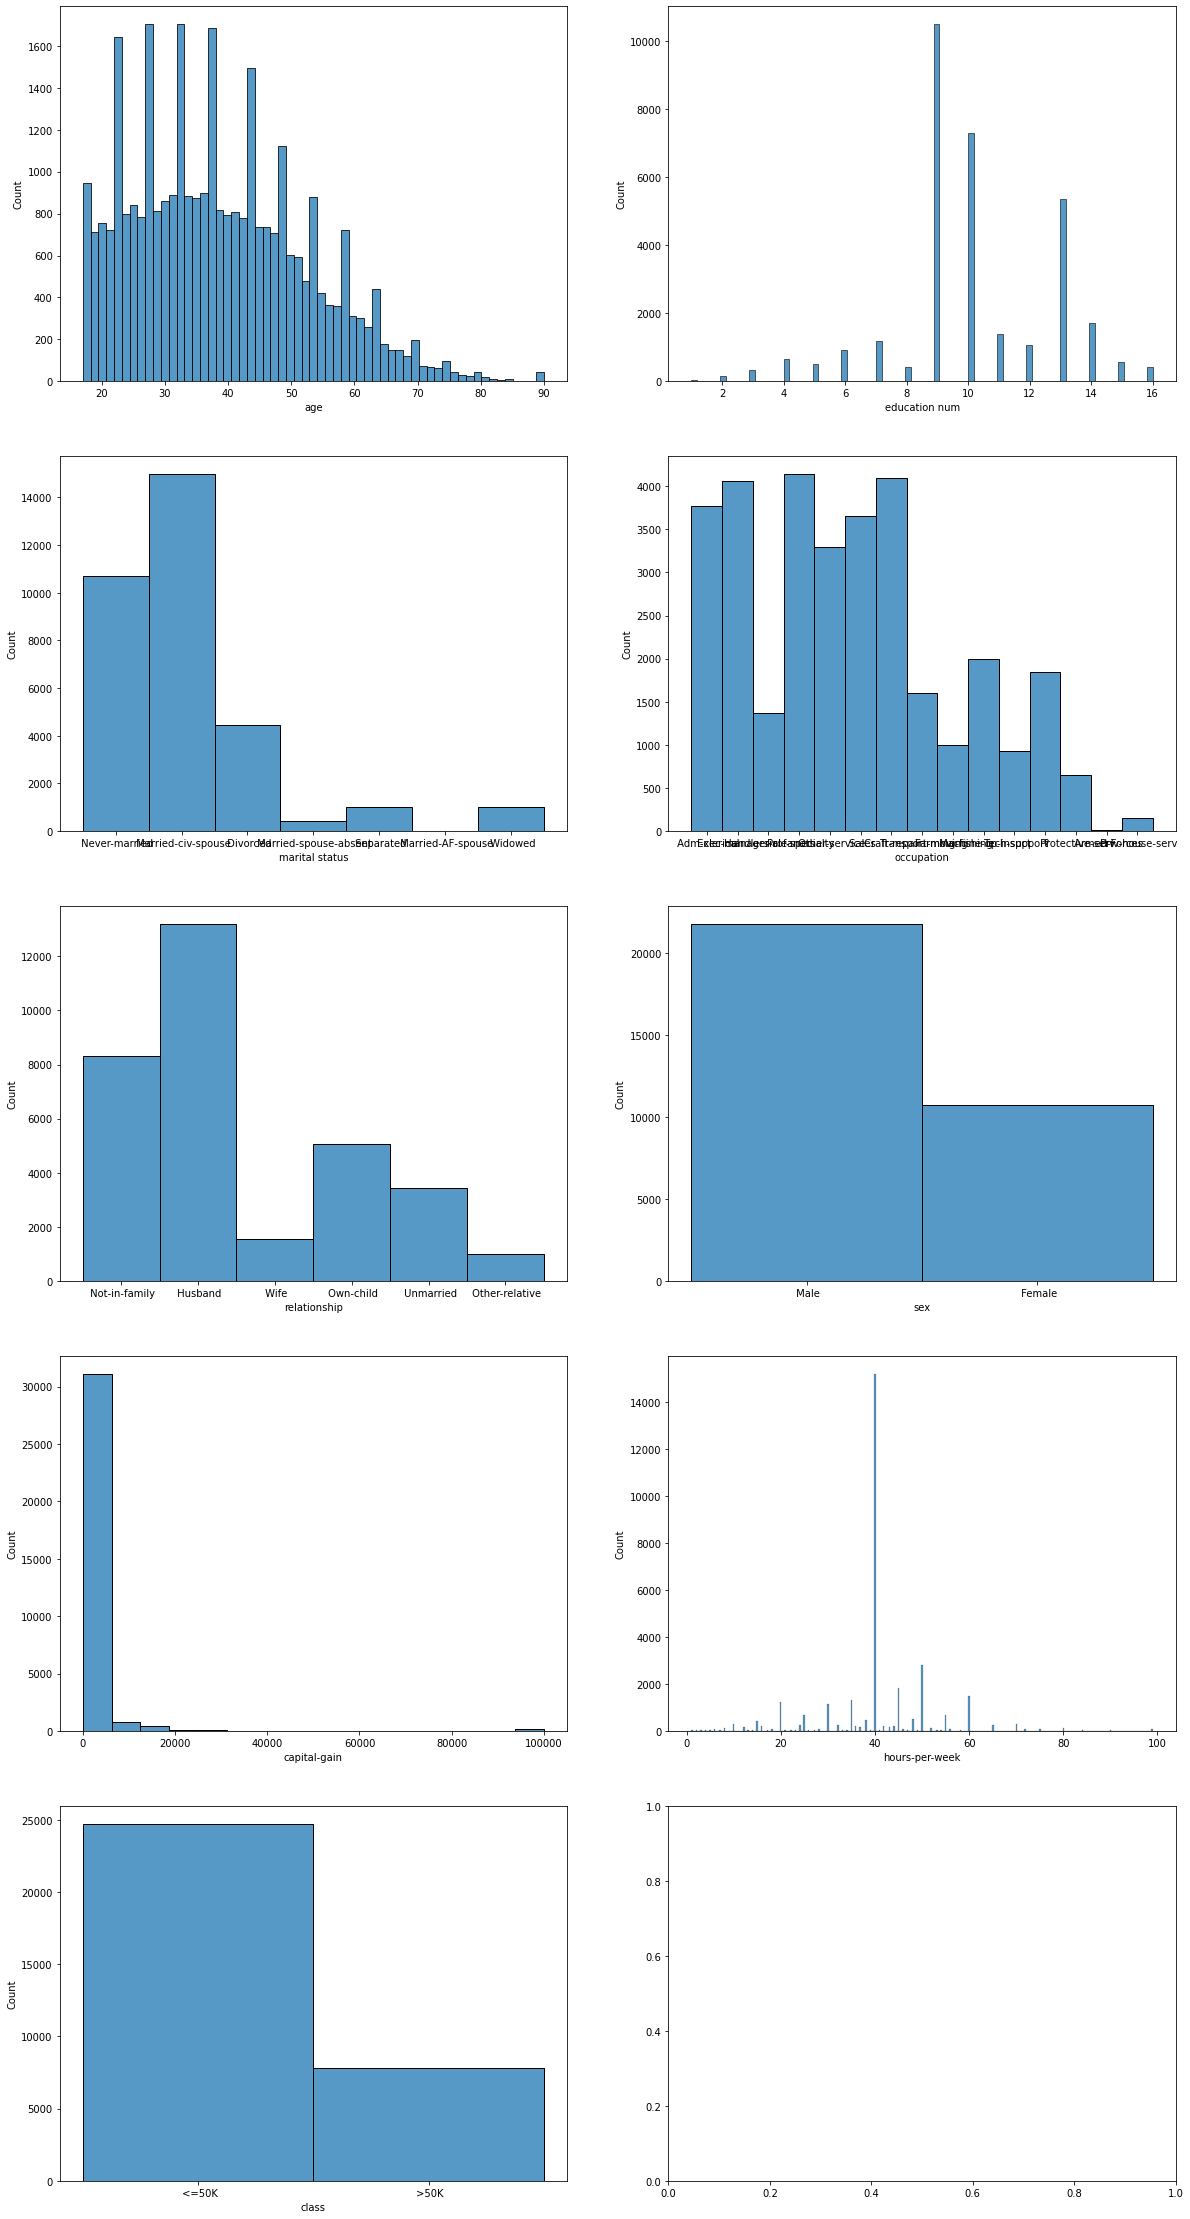

In [14]:
# plot distributions
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=[20, 40])
for idx, col in enumerate(data.columns):
  sns.histplot(data[col], ax = axes[idx // 2, idx % 2])

Right skewed attributes: age, capital-gain

left skewed: education number of years

no skew: hours per week - centered around 40.

All other attributes are categorical

### 2.2 Model construction
Use GridSearchcv and cross validation

#### Decision Tree Model / Metrics / Visuals

In [15]:
from sklearn.model_selection import train_test_split

#create train set for cross validation -> parameter tuning
# create test split to test model with ideal parameters on
X_train, X_test, y_train, y_test = train_test_split(data_encoded, response, test_size=0.2, random_state=42)


In [16]:
# single decision tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                    ('dt', DecisionTreeClassifier())])

params = [{'dt__max_depth': [3,8,15,30],
           'dt__criterion': ['gini', 'entropy'],
           'dt__max_features': ['auto', 'sqrt', 'log2'],
           'dt__min_samples_leaf': [1, 2, 3, 5, 8]}]

gs_dt = GridSearchCV(dt_pipe,
                     param_grid=params,
                     scoring='accuracy',
                     cv=5)

gs_dt.fit(X_train,y_train)
print(gs_dt.best_params_)
print(gs_dt.best_score_)

{'dt__criterion': 'entropy', 'dt__max_depth': 15, 'dt__max_features': 'sqrt', 'dt__min_samples_leaf': 3}
0.8434816088646219


In [17]:
# print metrics
from sklearn.metrics import classification_report, accuracy_score

# calculate y_hat with best parameters determined by the crossvalidated grid search
dtbest = DecisionTreeClassifier(criterion='gini', max_depth=15, max_features='log2', min_samples_leaf= 5)
predictions = dtbest.fit(X_train, y_train).predict(X_test)
predicted_probas = DecisionTreeClassifier(criterion='gini', max_depth=15, max_features='log2', min_samples_leaf= 5).fit(X_train, y_train).predict_proba(X_test)


print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.71      0.60      0.65      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513

Predicted labels:  [0 1 1 ... 1 0 0]


In [18]:
data_encoded.columns

Index(['age', 'education num', 'capital-gain', 'hours-per-week',
       'marital status_ Divorced', 'marital status_ Married-AF-spouse',
       'marital status_ Married-civ-spouse',
       'marital status_ Married-spouse-absent',
       'marital status_ Never-married', 'marital status_ Separated',
       'marital status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 's

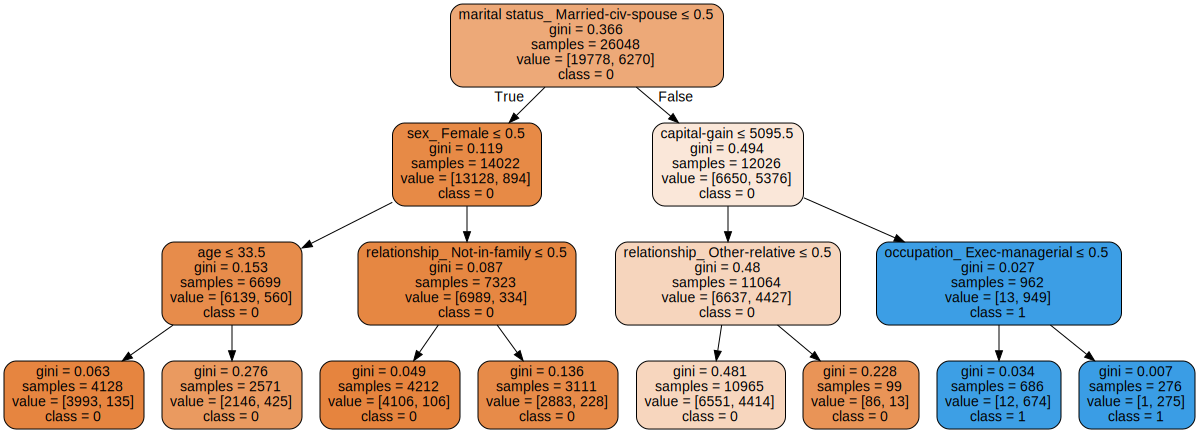

In [37]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='log2', min_samples_leaf= 5).fit(X_train,y_train), out_file=None, 
                     feature_names = data_encoded.columns,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [20]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


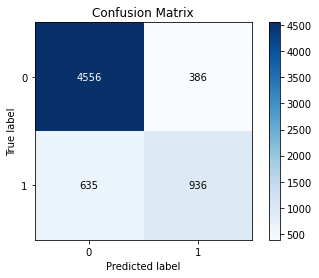

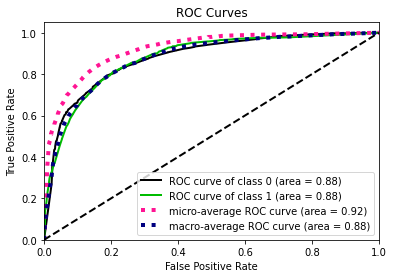

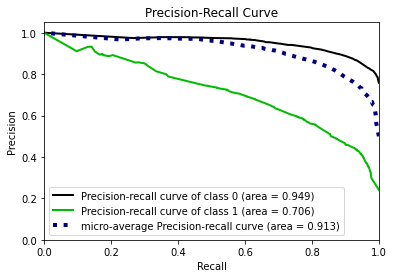

In [21]:
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

#### Random Forest Model / Metrics / Visuals

In [22]:
#random forest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rf = RandomForestClassifier()

params = {'max_depth': [5,7,9,12,15],
          'n_estimators': [50,100,200,500],
          'max_features': ['sqrt', 'log2']
          }

grid = GridSearchCV(rf, params, cv=5, scoring = 'accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_train,y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 12, 'max_features': 'log2', 'n_estimators': 100}
0.8706234643734644


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4942
           1       0.78      0.56      0.65      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513

Predicted labels:  [0 1 1 ... 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


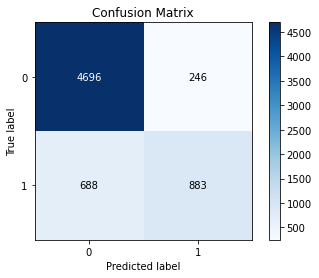

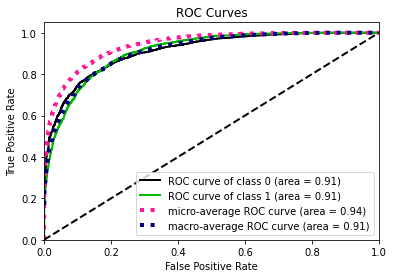

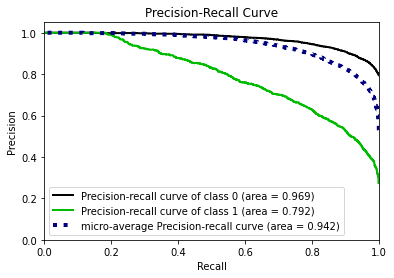

In [23]:
# print metrics
rfbest = RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=200)
# calculate y_hat with best parameters determined by the crossvalidated grid search
rfpredictions = rfbest.fit(X_train, y_train).predict(X_test)
rfpredicted_probas = rfbest.fit(X_train, y_train).predict_proba(X_test)


print(classification_report(y_test, rfpredictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', rfpredictions)

#
skplt.metrics.plot_confusion_matrix(y_test, rfpredictions)
skplt.metrics.plot_roc(y_test, rfpredicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, rfpredicted_probas)
plt.show()

#### Adaboost Model / Metrics / Visuals

In [25]:
#adaboost
ada = AdaBoostClassifier()

paramsAda = {'n_estimators': [25, 50,100,200,500,1000],
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1,2],
          'algorithm': ['SAMME', 'SAMME.R']
          }

gridAda = GridSearchCV(ada, paramsAda, cv=5, scoring = 'accuracy')
gridAda.fit(X_train, y_train)
print(gridAda.best_params_)
print(gridAda.score(X_train,y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 500}
0.8626382063882064


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4942
           1       0.77      0.63      0.69      1571

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.80      6513
weighted avg       0.86      0.87      0.86      6513

Predicted labels:  [0 1 1 ... 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


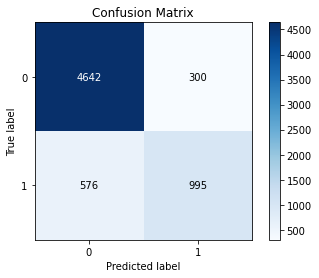

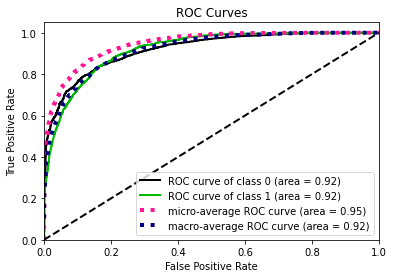

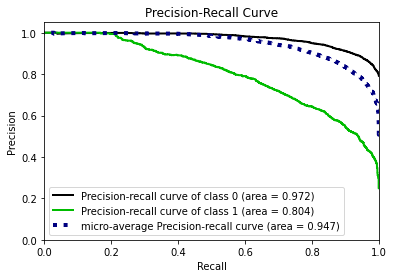

In [27]:
# print metrics
adabest = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1, n_estimators=500)
# calculate y_hat with best parameters determined by the crossvalidated grid search
adapredictions = adabest.fit(X_train, y_train).predict(X_test)
adapredicted_probas = adabest.fit(X_train, y_train).predict_proba(X_test)


print(classification_report(y_test, adapredictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', adapredictions)

#plot confusion matrix, roc and auc
skplt.metrics.plot_confusion_matrix(y_test, adapredictions)
skplt.metrics.plot_roc(y_test, adapredicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, adapredicted_probas)
plt.show()

#### XGBoost Model / Metrics / Visuals

In [34]:
#xgboost
import xgboost as xgb

xgb = xgb.XGBClassifier()

paramsxgb = {'eta': [0.000005, 0.00001, 0.0001, 0.001],
             'max_depth': [5, 9, 15],
             'gamma':[0, 0.2, 0.5, 1],
             'colsample_bytree': [0.2, 0.6, 0.8],
             'min_child_weight': [4,6,8],
             'subsample:': [0.1, 0.6, 0.9]}

gridxgb = GridSearchCV(xgb, paramsxgb, cv=5, scoring = 'accuracy')
gridxgb.fit(X_train, y_train)
print(gridxgb.best_params_)
print(gridxgb.score(data_encoded,response))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

{'colsample_bytree': 0.6, 'eta': 1e-05, 'gamma': 0, 'max_depth': 9, 'min_child_weight': 6, 'subsample:': 0.6}
0.8710113325757809


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4942
           1       0.76      0.65      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513

Predicted labels:  [0 1 1 ... 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


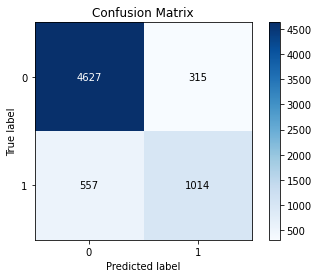

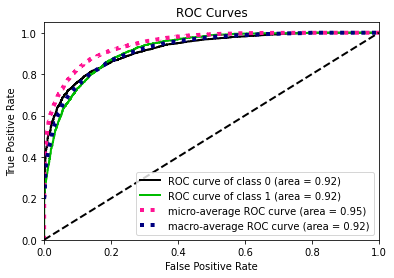

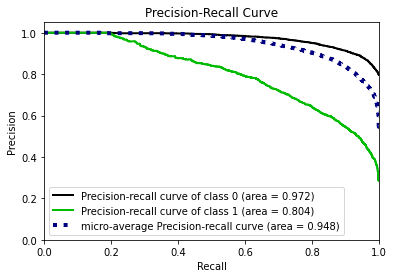

In [35]:
import xgboost as xgboost
xgbbest = xgboost.XGBClassifier(colsample_bytree=0.6, eta= 0.00000001, gamma= 0, max_depth = 6, min_child_weight=4, subsample=0.4)
xgbpredictions = xgbbest.fit(X_train,y_train).predict(X_test)
xgbpredicted_probas = xgbbest.fit(X_train, y_train).predict_proba(X_test)


print(classification_report(y_test, xgbpredictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', xgbpredictions)

#plot confusion matrix, roc and auc
skplt.metrics.plot_confusion_matrix(y_test, xgbpredictions)
skplt.metrics.plot_roc(y_test, xgbpredicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, xgbpredicted_probas)
plt.show()